# Linear regression

Import all the modules you will need in this notebook here:

In [150]:
# exercise 0
# Put your solution here!

import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [151]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

fram = pd.read_csv(get_path("fram.txt"), sep="\t")
fram.describe()


,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [152]:
# exercise 2
# Put your solution here!

def rescale(column: pd.Series) -> pd.Series:
    return (column - column.mean()) / (2 * column.std())

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [153]:
# exercise 3
# Put your solution here!


#for i in fram.columns:
#    print(uniques := fram[i].unique(), len(uniques))

# I assume that these are the ones to be rescaled
columns_to_scale = ["AGE", "FRW", "SBP", "DBP", "CHOL", "CIG"]

for col in fram[columns_to_scale]:
    rescaled = rescale(fram[col])
    fram["s" + col] = rescaled
    
# IDK why this resulted in TMC {"rescale" is not defined} error in every next part even this was PASS, but whatever lets loop then.
#farm = fram.assign(**{'s' + column: rescale(fram[column]) for column in columns_to_scale})

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [154]:
# exercise 4
# Put your solution here!

fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           4.13e-40
Time:                        20:59:41   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [155]:
# exercise 5
# Put your solution here!

fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           2.44e-46
Time:                        20:59:41   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Based on Adj. R-sqrd adding sAGE increases the explanatory power of the model by 0.021 units (0.123 -> 0.144).

Variable "sFRW" seems to expain the most of these variables with coeff 17.826

***

Try to add to the model all the interactions with other variables. 

In [156]:
# exercise 6
# Put your solution here!


fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           4.92e-43
Time:                        20:59:41   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

/home/saavajuu/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


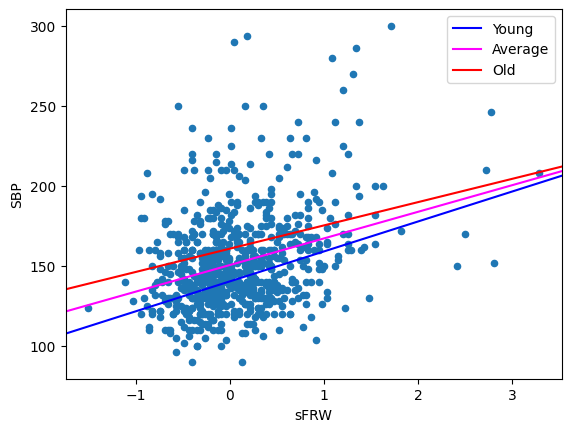

In [157]:
# exercise 7
# Put your solution here!

model_params = fit.params


fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=model_params.Intercept - model_params["sAGE"], slope=model_params.sFRW - model_params["sFRW:sAGE"],
ax=plt.gca(), color="blue", label="Young")
abline_plot(intercept=model_params.Intercept, slope=model_params.sFRW,
ax=plt.gca(), color="magenta", label="Average")
abline_plot(intercept=model_params.Intercept + model_params["sAGE"], slope=model_params.sFRW + model_params["sFRW:sAGE"],
ax=plt.gca(), color="red", label="Old")
plt.legend();

How does the dependence of blood pressure on weight change as a person gets older?
***
Blood pressure is more sensitive to the changes in sFRW when person gets older
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           2.99e-40
Time:                        20:59:41   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

/home/saavajuu/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


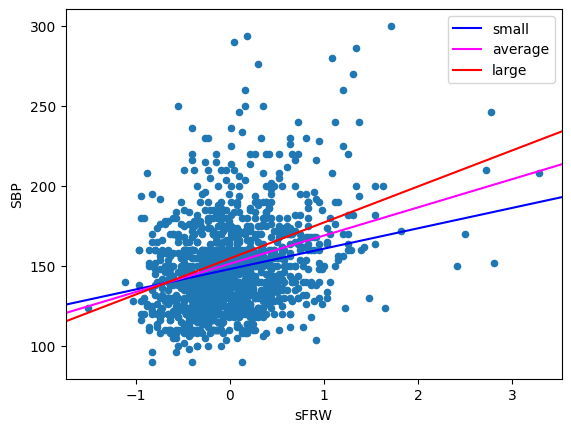

In [158]:
# exercise 8
# Put your solution here!

fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + sFRW:sCIG + SEX:sCHOL + SEX:sAGE + SEX:sCIG + sCHOL:sAGE + sCHOL:sCIG + sAGE:sCIG" , data=fram).fit()
print(fit.summary())

model_params = fit.params

fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept=model_params.Intercept - model_params["sCHOL"], slope=model_params.sFRW - model_params["sFRW:sCHOL"],
ax=plt.gca(), color="blue", label="small")
abline_plot(intercept=model_params.Intercept, slope=model_params.sFRW,
ax=plt.gca(), color="magenta", label="average")
abline_plot(intercept=model_params.Intercept + model_params["sCHOL"], slope=model_params.sFRW + model_params["sFRW:sCHOL"],
ax=plt.gca(), color="red", label="large")
plt.legend();

How does the model and its accuracy look?

***

One desimal is gained in Adj.R.sqrt , however adding more variables might not be beneficial in long run.

***

# Logistic regression

In [159]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [160]:
# exercise 9
# Put your solution here!

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,family=sm.families.Binomial()).fit()

print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues >= 0.5) & ~fram.HIGH_BP))
print(f'Error_rate: {error_rate_orig}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Tue, 20 Aug 2024   Deviance:                       1713.7
Time:                        20:59:41   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [161]:
# exercise 10
# Put your solution here!

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + SEX:sAGE + sFRW:sAGE", data=fram,family=sm.families.Binomial()).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues >= 0.5) & ~fram.HIGH_BP))
print(f'"Error_rate": {error_rate} | "Previous Model - Current": {error_rate_orig - error_rate}')

"Error_rate": 0.3278335724533716 | "Previous Model - Current": 0.02797704447632715


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

/tmp/ipykernel_3822/3670674746.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(fram_w["sFRW"], fram_w["HIGH_BP"],  cmap="coolwarm", label="observed data points")
/tmp/ipykernel_3822/3670674746.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(fram_m["sFRW"], fram_m["HIGH_BP"], cmap="coolwarm", label="observed data points")


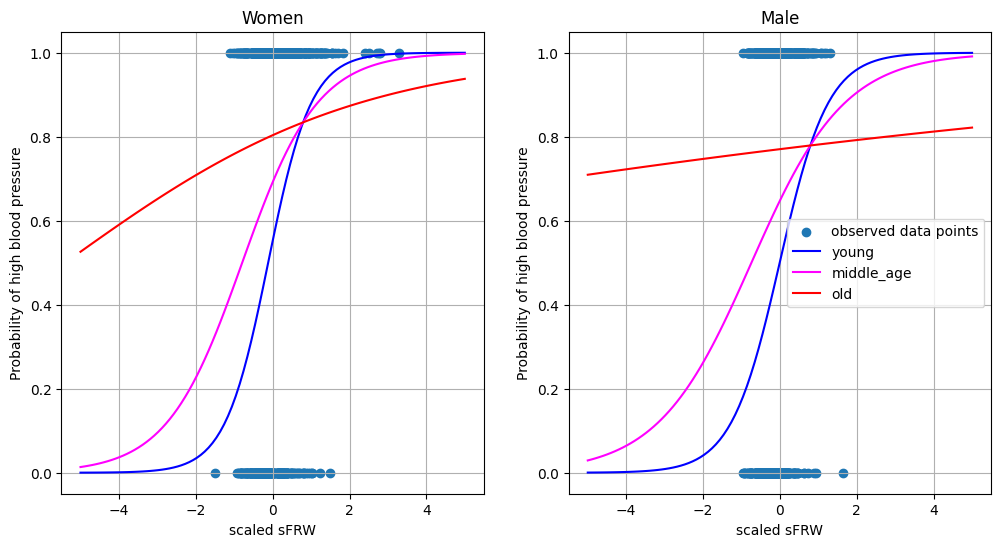

In [162]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

fram_m = fram[fram["SEX"] == "male"]
fram_w = fram[fram["SEX"] == "female"]

base_intercept = fit.params['Intercept']
base_slope = fit.params['sFRW']
sex_male_intercept = fit.params.get("SEX[T.male]", 0)
sex_male_slope_frw = fit.params.get("SEX[T.male]:sFRW", 0)
sex_male_slope_age = fit.params.get("SEX[T.male]:sAGE", 0)
slope_frw_age = fit.params.get("sFRW:sAGE", 0)
slope_age = fit.params.get("sAGE", 0)


intercept_m = base_intercept + sex_male_intercept
slope_m = base_slope + sex_male_slope_frw + sex_male_slope_age
intercept_w = base_intercept
slope_w = base_slope

intercepts_m = {
    "middle_age": intercept_m,
    "young": intercept_m - slope_age,
    "old": intercept_m + slope_age
}
slopes_m = {
    "middle_age": slope_m,
    "young": slope_m - slope_frw_age,
    "old": slope_m + slope_frw_age
}
intercepts_w = {
    "middle_age": intercept_w,
    "young": intercept_w - slope_age,
    "old": intercept_w + slope_age
}
slopes_w = {
    "middle_age": slope_w,
    "young": slope_w - slope_frw_age,
    "old": slope_w + slope_frw_age
}

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={"xlabel": "scaled sFRW", "ylabel": "Probability of high blood pressure"})

ax[0].set_title("Women")
ax[0].grid(True)
ax[0].scatter(fram_w["sFRW"], fram_w["HIGH_BP"],  cmap="coolwarm", label="observed data points")
X = np.linspace(-5, 5, 100)
for age_group, color in zip(["young", "middle_age", "old"], ["blue", "magenta", "red"]):
    Y = logistic(intercepts_w[age_group] + slopes_w[age_group] * X)
    ax[0].plot(X, Y, color=color, label=age_group)
ax[0].legend

ax[1].set_title("Male")
ax[1].grid(True)
ax[1].scatter(fram_m["sFRW"], fram_m["HIGH_BP"], cmap="coolwarm", label="observed data points")
for age_group, color in zip(["young", "middle_age", "old"], ["blue", "magenta", "red"]):
    Y = logistic(intercepts_m[age_group] + slopes_m[age_group] * X)
    ax[1].plot(X, Y, color=color, label=age_group)
ax[1].legend()


# Redid this one bcs with functions inside the cell the test are fckd up, so no more clean functions for this course.


How do the models with different ages and genders differ from each other?

***
The probability for HighBloodPressure (hbp) increases with aging this is also seen with the old people being most likely to have hbp, In general males in all age groups compared to similar aged womens seem to have lower prob for hbp ( very small diff ) atleast with eyeballing AUC
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [163]:
# exercise 12
# Put your solution here!

def train_test_split(df, train_fraction=0.8):
    df = df.sample(frac=1).reset_index(drop=True)
    n_train = int(len(df) * train_fraction)
    return df.iloc[:n_train], df.iloc[n_train:]


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [164]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model = []
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + SEX:sAGE + sFRW:sAGE", data=train,family=sm.families.Binomial()).fit()
    predicitons = fit.predict(test, transform=True)
    error_rate = np.mean(((predicitons < 0.5) & test.HIGH_BP) | ((predicitons >= 0.5) & ~test.HIGH_BP))
    error_model.append(error_rate)

print(f'Accuracy: {1 - np.mean(error_model)} Error: {np.mean(error_model)}')
        

Accuracy: 0.6688172043010753 Error: 0.3311827956989247


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [165]:
# exercise 14
# Put your solution here!

# had or has ...

fram["hasCHD"] = fram["CHD"] > 0
fram["hasCHD"] = fram["hasCHD"].astype(int)

cases = (np.count_nonzero(fram["hasCHD"]))
mean = (np.mean(fram["hasCHD"])*100)
n = (len(fram["hasCHD"]))

print(cases/n)
print(mean)

0.22022955523672882
22.022955523672884


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [166]:
# exercise 15
# Put your solution here!

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues >= 0.5) & ~fram.hasCHD))
print(f'Accuracy: {1-error_rate} |  Error_rate: {error_rate}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 20 Aug 2024   Deviance:                       1442.4
Time:                        20:59:44   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

/tmp/ipykernel_3822/2026409035.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter("sCIG", "hasCHD", data=fram, cmap="coolwarm", label = "hasCHD observed")


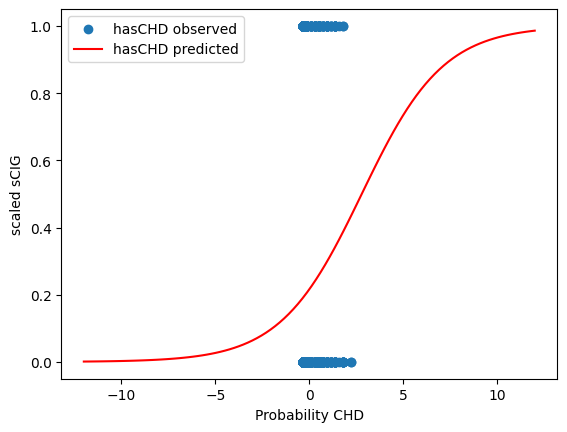

In [167]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

# sCIG is the most important based on last summary

params = fit.params

plt.scatter("sCIG", "hasCHD", data=fram, cmap="coolwarm", label = "hasCHD observed")
X = np.linspace(-12,12, 100)
plt.plot(X, logistic(params["Intercept"] + params["sCIG"] * X), color="red", label="hasCHD predicted")
plt.xlabel("Probability CHD")
plt.ylabel("scaled sCIG")

plt.legend()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?

***
The usefullness depends on what to use it with. Model with > 50% can be seen better than quess but with detecting diseases this acc (77.9) might not be good enough for other than screening or similar use cases. For automating detection/prediction this model lacks still in many ways. I see this model as something that might be used for first filter or similar.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [168]:
# exercise 17
# Put your solution here!

act_data = fram[["CIG", "FRW", "CHOL"]].copy()
means = act_data.mean()
stds = act_data.std()

simulate_entry = pd.DataFrame({
    'CIG': [17],
    'FRW': [100],
    'CHOL': [200]
})

# remember the 2 * ..... in rescale function
simulate_entry['sCHOL'] = (simulate_entry['CHOL'] - means['CHOL']) / (2 * stds['CHOL'])
simulate_entry['sCIG'] = (simulate_entry['CIG'] - means['CIG']) / (2 *  stds['CIG'])
simulate_entry['sFRW'] = (simulate_entry['FRW'] - means['FRW']) / (2 * stds['FRW'])

point = {"sCIG": simulate_entry['sCIG'], "sFRW": simulate_entry['sFRW'], "sCHOL": simulate_entry['sCHOL']}

simulate_entry['sCHOL:sCIG'] = simulate_entry['sCHOL'] * simulate_entry['sCIG']
simulate_entry['sCHOL:sFRW'] = simulate_entry['sCHOL'] * simulate_entry['sFRW']
simulate_entry['sCIG:sFRW'] = simulate_entry['sCIG'] * simulate_entry['sFRW']

simulate_entry = sm.add_constant(simulate_entry, has_constant='add')
predicted = float(fit.predict(simulate_entry).iloc[0])
print(f"Probability of having the disease: {predicted:.4f}")

Probability of having the disease: 0.2162
